CUSTOMER CHURN PREDICTION

BUSINESS UNDERSTANDING

BUSINESS OVERVIEW

BUSINESS PROBLEM

BUSINESS OBJECTIVES

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

 - To analyze the impact of customer demographics  on churn.

 - To examine the effect of account details  on churn.

 - To assess how subscription plans influence churn.

 - To explore how customer service call frequency relates to churn.

 - To Develop a predictive model to identify customers at risk of churning based on these factors.

 Key Questions

1. How do customer demographics  affect churn?

2. How do account details  influence churn?

3. How do subscription plans impact churn?

4. How does the frequency of customer service calls relate to churn?

5. Can a predictive model accurately identify customers at risk of churning based on these factors?



DATA UNDERSTANDING

The dataset is obtained from Kaggle, specifically from the dataset [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset has 3333 records and 21 columns including numeric, categorical, and boolean variables.The target variable `churn`  indicates whether a customer has left the service (False) or remained (True).

IMPORT LIBRARIES


In [2]:
# Import necessary libraries

# Data loading and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc, RocCurveDisplay

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#LOADING DARASET
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


OVERVIEW

In [4]:
#INFORMATION SUMMARY
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3,333 rows which represent the customers. The data set has 21 columns which are both numeric e.g `total minutes, charges, account length` and categorical e.g `international plan, voicemail plan`. Our Target variable is `churn` column which is boolen.

In [5]:
data.shape

(3333, 21)

In [6]:
# Display the numerical and categorical columns
print(f"Numerical columns: {data.select_dtypes(include = 'number').columns}\n")
print(f"Categorical columns: {data.select_dtypes(include = 'object').columns}\n")

Numerical columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')



In [7]:
# Checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
# Check for duplicate values
data.duplicated().sum()

0

In [9]:
# Statistical summary of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


DATA CLEANING

We begin by dropping `phone number` since it is a unique identifier so it does not carry predictive information about whether a customer will churn or not.

In [10]:
# Drop the phone_number column

data = data.drop(columns = ["phone number"])

data.shape # Check the dataset shape after dropping the column

(3333, 20)

In [11]:
# Checking for unique values in categorical columns
categorical_cols = data.select_dtypes(include = "object").columns
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}\n")


state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

international plan: ['no' 'yes']

voice mail plan: ['yes' 'no']



Standardizing Categorical Values

To ensure consistency, we standardize the text in categorical columns by converting them to lowercase and removing any leading or trailing spaces.

In [12]:
# Ensure uniformity in categorical columns - remove extra spaces, lowercase

data['international plan'] = data['international plan'].str.lower().str.strip()
data['voice mail plan'] = data['voice mail plan'].str.lower().str.strip()

# Standardize state codes - remove extra spaces, uppercase
data['state'] = data['state'].str.upper().str.strip()

for col in categorical_cols:
    print(f"{col}: {data[col].unique()}\n")

state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

international plan: ['no' 'yes']

voice mail plan: ['yes' 'no']



Standardizing Column Names

We reformat the column names for better readability and to make them easier to work with in code by converting them to lowercase and replacing spaces with underscores.

In [13]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print(data.columns)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


In [14]:
# Check for missing values
data.isnull().sum()

state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [15]:
data.duplicated().sum()

0

Data Types validation and conversion

We ensure all data is in the correct format for analysis. Numerical columns are confirmed to be numeric types, and categorical columns are converted to the category data type for efficiency and correct handling by machine learning algorithms. The `area_code` is converted to a categorical type as it represents a group label, not a numerical quantity.

In [16]:
# Converting objects to categoricals
data["state"] = data["state"].astype("category")
data["international_plan"] = data["international_plan"].astype("category")
data["voice_mail_plan"] = data["voice_mail_plan"].astype("category")

In [17]:
# Convert area code
data['area_code'] = data['area_code'].astype("category")

In [18]:
# Ensure numeric columns are numeric
numeric_cols = data.select_dtypes(include = ['number']).columns
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

# Check data types
data.dtypes

state                     category
account_length               int64
area_code                 category
international_plan        category
voice_mail_plan           category
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
churn                         bool
dtype: object

Exploratory Data Analysis

Univariate analysis examines each variable individually to understand its distribution and central tendency.

DISTRIBUTION OF TARGET VARIABLE CHURN

churn
False    2850
True      483
Name: count, dtype: int64
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


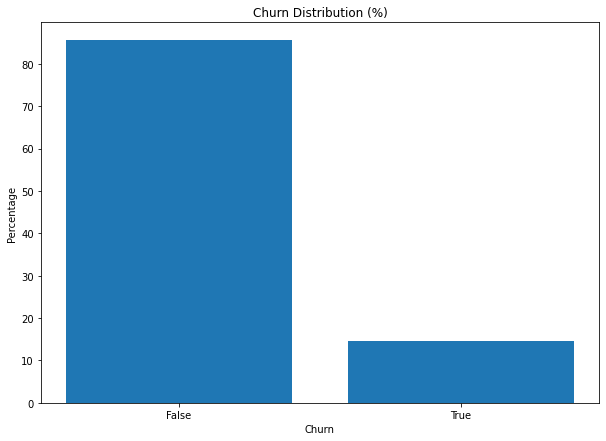

In [29]:
# Distribution of target variable churn

# Count of target variable
print(data["churn"].value_counts())

# Percentage of target variable
print(data["churn"].value_counts(normalize = True) * 100)

percentages = data["churn"].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 7))
plt.bar(percentages.index.astype(str), percentages.values)
plt.title("Churn Distribution (%)")
plt.xlabel("Churn")
plt.ylabel("Percentage")
plt.show()



2,850 customers did not churn, representing 85.5% of the dataset, while 483 customers churned, accounting for 14.5%. This indicates that the dataset is imbalanced, with significantly fewer churned customers compared to non-churned customers.

DISTRIBUTION OF VOICEMAIL PLAN

voice_mail_plan
no     2411
yes     922
Name: count, dtype: int64
voice_mail_plan
no     72.337234
yes    27.662766
Name: proportion, dtype: float64


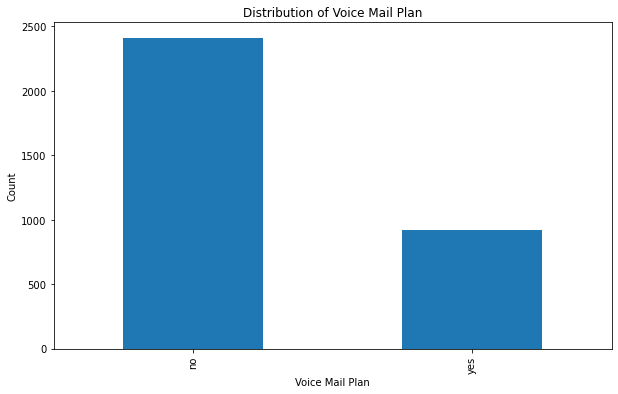

In [31]:
# Distribution of voice_mail_plan
print(data["voice_mail_plan"].value_counts())

# Percentage
print(data["voice_mail_plan"].value_counts(normalize = True) * 100)

# Visualize

data["voice_mail_plan"].value_counts().plot(kind="bar", figsize=(10, 6))
plt.title("Distribution of Voice Mail Plan")
plt.xlabel("Voice Mail Plan")
plt.ylabel("Count")
plt.show()



72% of customers do not have voicemail plan. 28% have a voice mail plan.

INTERNATIONAL PLAN DISTRIBUTION

international_plan
no     3010
yes     323
Name: count, dtype: int64
international_plan
no     90.309031
yes     9.690969
Name: proportion, dtype: float64


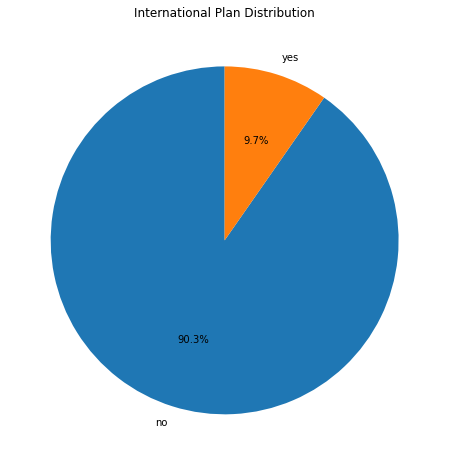

In [26]:
# Distribution of international_plan column
print(data["international_plan"].value_counts())

# Percentage
print(data["international_plan"].value_counts(normalize = True) * 100)


counts = data["international_plan"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("International Plan Distribution")
plt.show()

3010 customers are not subscribed to an international plan while 323 have the international plan.

DISTRIBUTION OF AREA CODE

area_code
415    1655
510     840
408     838
Name: count, dtype: int64
area_code
415    49.654965
510    25.202520
408    25.142514
Name: proportion, dtype: float64


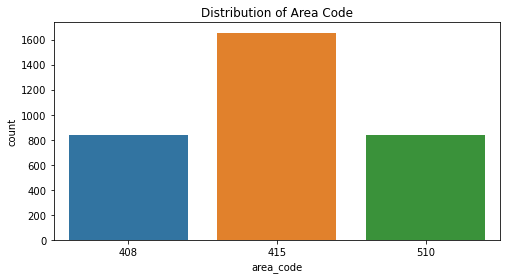

In [35]:
# Distribution of area_code column

print(data["area_code"].value_counts())

# Percentage
print(data["area_code"].value_counts(normalize = True) * 100)

# Visualize
plt.figure(figsize = (8, 4))
sns.countplot(x = "area_code", data = data)
plt.title("Distribution of Area Code")
plt.show()



Nearly half of the customers are located in the 415 area code, while the rest are fairly evenly distributed between the 510 and 408 area codes.

DISTRIBUTION OF STATES

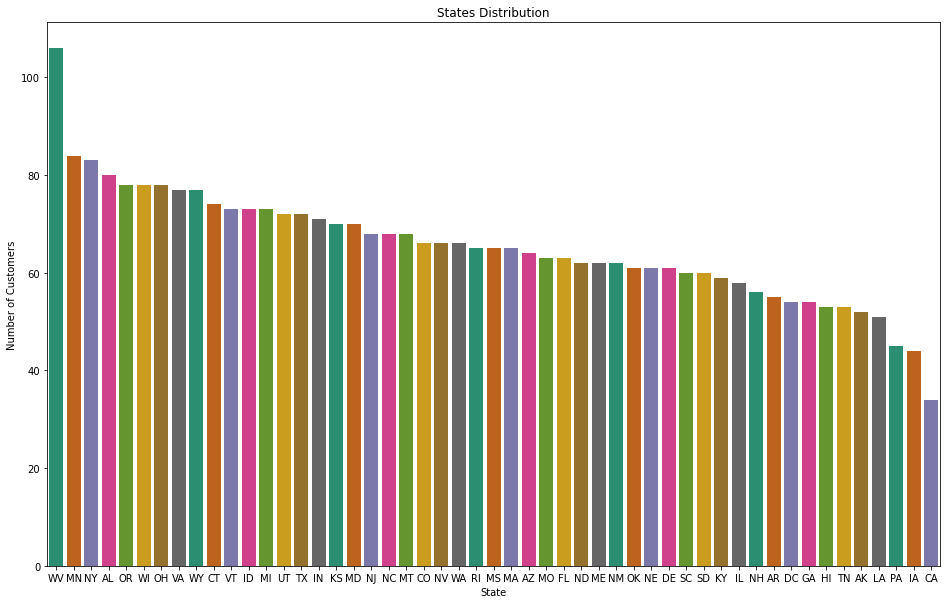

In [42]:
# Distribution of state column

# Get states by count
states = data['state'].value_counts() 

# Visualize
# Distribution of state column

# Get states by count
states = data['state'].value_counts() 

# Visualize
plt.figure(figsize = (16, 10))
sns.barplot(x = states.index, y = states.values, palette = 'Dark2', order = states.index)

plt.title("States Distribution")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()



WV has the highest customer count at 106, representing the largest share in the group. MN, NY, AL, and OR follow closely, each recording between 78 and 84 customers

BIVARIATE ANALYSIS

Bivariate analysis explores the relationship between two variables to understand how one may influence or be associated with the other. In this context, we will focus on how various factors relate to customer churn

CHURN AGAINST ACCOUNT LENGTH

CHURN VS CUSTOMER SERVICE CALL

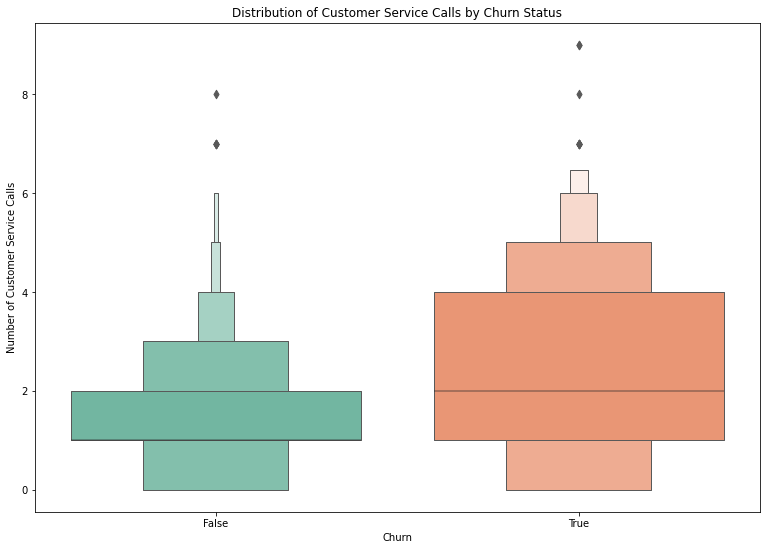

In [65]:
# Churn vs Customer service calls 

plt.figure(figsize=(13,9))
sns.boxenplot(
    data=data,
    x='churn',
    y='customer_service_calls',
    palette='Set2'
)
plt.title('Distribution of Customer Service Calls by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Number of Customer Service Calls')
plt.show()



From the plot, we can see that customers who churn tend to make more customer service calls, with a higher median and wider range, while non-churning customers generally make fewer calls

VOICEMAIL PLAN AND CHURN

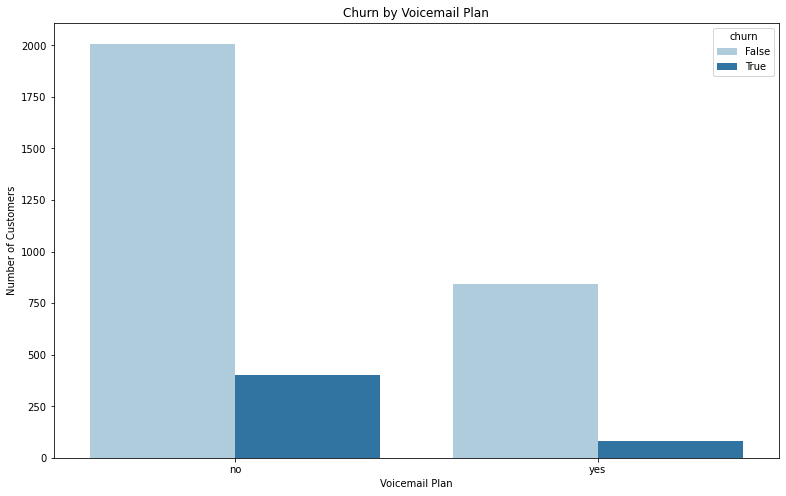

In [64]:
plt.figure(figsize = (13, 8))
sns.countplot(x = 'voice_mail_plan', hue = data['churn'].astype(str), data = data, palette = 'Paired')
plt.title("Churn by Voicemail Plan")
plt.xlabel("Voicemail Plan")
plt.ylabel("Number of Customers")
plt.show();

Customers who have subscribed to voicemail plans are less likely to churn.

 Plot to show international plan and churn

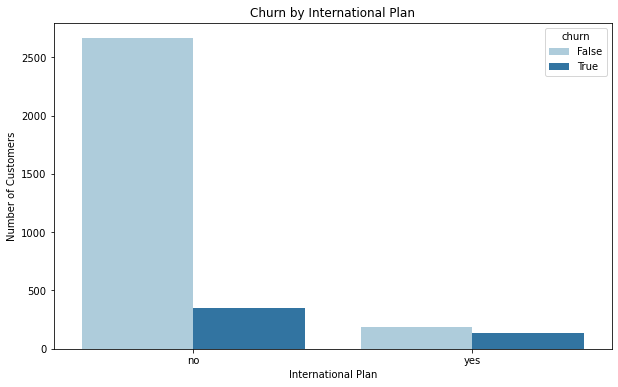

In [63]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'international_plan', hue = data['churn'].astype(str), data = data, palette = 'Paired')
plt.title("Churn by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.show()

While most customers opt out of international plans, those who do subscribe are less likely to churn.

Box plots to show charges vs churn

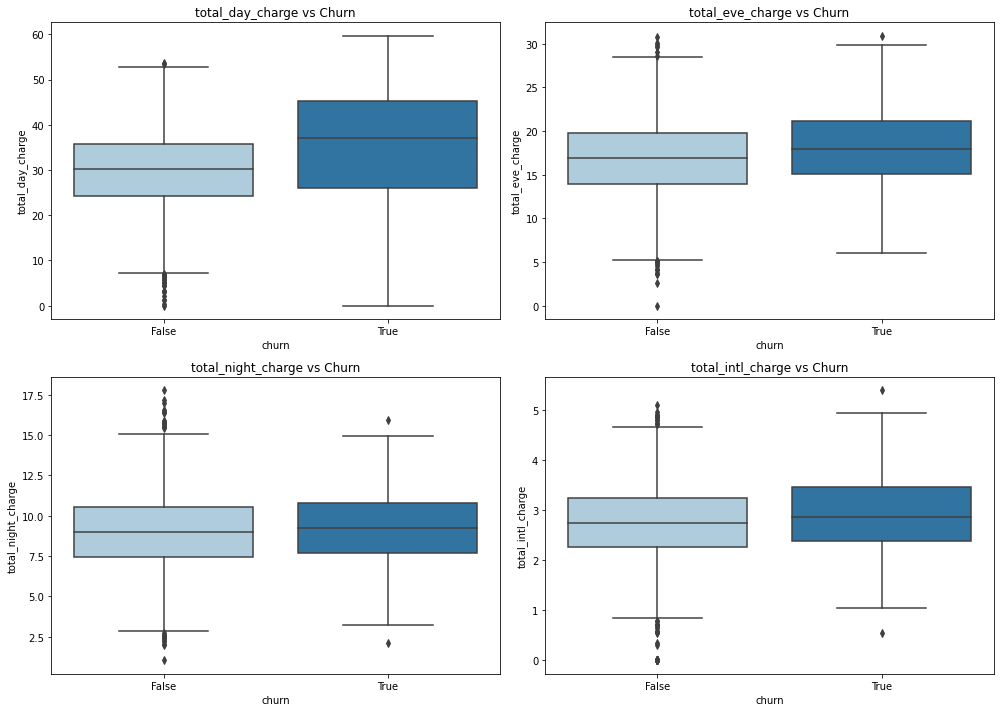

In [68]:

charge_features = ["total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"]

plt.figure(figsize = (14,10))
for i, col in enumerate(charge_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x = "churn", y = col, data = data, palette = "Paired")
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()